**Выполнил**: Федюкин Д.А.

**Вариант**: 10

**Задание №1**: Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

**Задание №2**: Для набора данных проведите удаление повторяющихся признаков.

**Задание №3**: Для произвольной колонки данных построить гистограмму.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler,  MinMaxScaler,  RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer

In [19]:
df = pd.read_csv('restaurants.csv')
numerical = [var for var in df.columns if df[var].dtypes!='O']
categorical = [var for var in df.columns if df[var].dtypes=='O']
df.head()

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"


# Задание №1

In [20]:
df_new = df.copy()
df_new.affluence.isnull().sum()

10933

In [21]:
def impute_column(dataset, column, strategy_param):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=None)
    all_data = imputer.fit_transform(temp_data)
    dataset[[column]] = all_data
    return dataset

In [22]:
df_new = impute_column(df_new, 'affluence', 'most_frequent')
df_new

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,2.0,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,2.0,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,2.0,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,2.0,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,2.0,"7XP5+P69, Mathbaria, Bangladesh"
...,...,...,...,...,...,...,...,...
12698,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,2.0,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী..."
12699,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,2.0,"Ward-13, Rajshahi, Bangladesh"
12700,ChIJB-JYPK3v-zkRzte9zqVK9vY,Bindu Hotel And Restaurant,24.374020,88.603169,3.8,689.0,1.0,"Station Rd, Rajshahi 6000, Bangladesh"
12701,ChIJTVZsObPv-zkRc6h1tV7FzXI,Mostak Hotel & Restaurant,24.374332,88.608138,0.0,NaN,2.0,"Dhaka Bus Terminal, Seroil, Rajshahi, Bangladesh"


In [23]:
df_new.affluence.isnull().sum()

0

# Задание №2

In [26]:
# Поскольку повторяющихся колонок в датасете нет сгенерим повтор
df['rating_copy'] = df.rating.copy()
df

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address,rating_copy
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh",0.0
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh",5.0
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba...",5.0
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh",5.0
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh",0.0
...,...,...,...,...,...,...,...,...,...
12698,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,NaN,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী...",0.0
12699,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,NaN,"Ward-13, Rajshahi, Bangladesh",5.0
12700,ChIJB-JYPK3v-zkRzte9zqVK9vY,Bindu Hotel And Restaurant,24.374020,88.603169,3.8,689.0,1.0,"Station Rd, Rajshahi 6000, Bangladesh",3.8
12701,ChIJTVZsObPv-zkRc6h1tV7FzXI,Mostak Hotel & Restaurant,24.374332,88.608138,0.0,NaN,NaN,"Dhaka Bus Terminal, Seroil, Rajshahi, Bangladesh",0.0


In [27]:
# Удаляем повтор
df.drop(['rating_copy'], inplace=True, axis=1)
df

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"
...,...,...,...,...,...,...,...,...
12698,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,NaN,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী..."
12699,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,NaN,"Ward-13, Rajshahi, Bangladesh"
12700,ChIJB-JYPK3v-zkRzte9zqVK9vY,Bindu Hotel And Restaurant,24.374020,88.603169,3.8,689.0,1.0,"Station Rd, Rajshahi 6000, Bangladesh"
12701,ChIJTVZsObPv-zkRc6h1tV7FzXI,Mostak Hotel & Restaurant,24.374332,88.608138,0.0,NaN,NaN,"Dhaka Bus Terminal, Seroil, Rajshahi, Bangladesh"


# Задание №3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


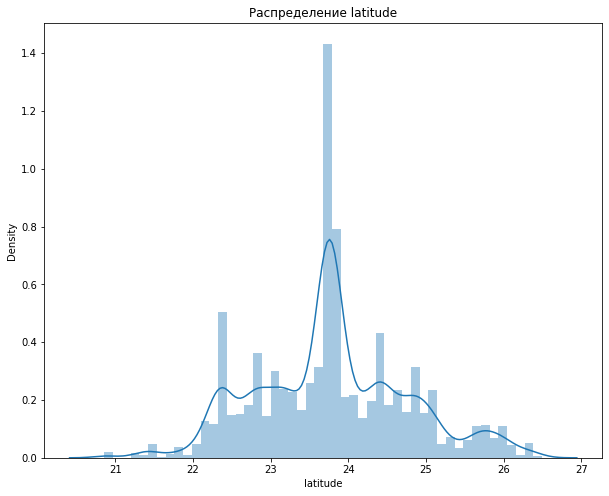

In [28]:
f, ax = plt.subplots(figsize=(10,8))
x = df['latitude']
ax = sns.distplot(x)
ax.set_title("Распределение latitude")
plt.show()